##Aprendizaje No Supervisado

In [2]:
# Importamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

# Cargar el dataset
dataset = pd.read_csv("Mall_Customers.csv")

# Inspeccionar las primeras filas
dataset.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
dataset.shape

(200, 5)

In [15]:
data = dataset.drop(['Gender'], axis=2)

ValueError: No axis named 2 for object type DataFrame

In [13]:
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age              

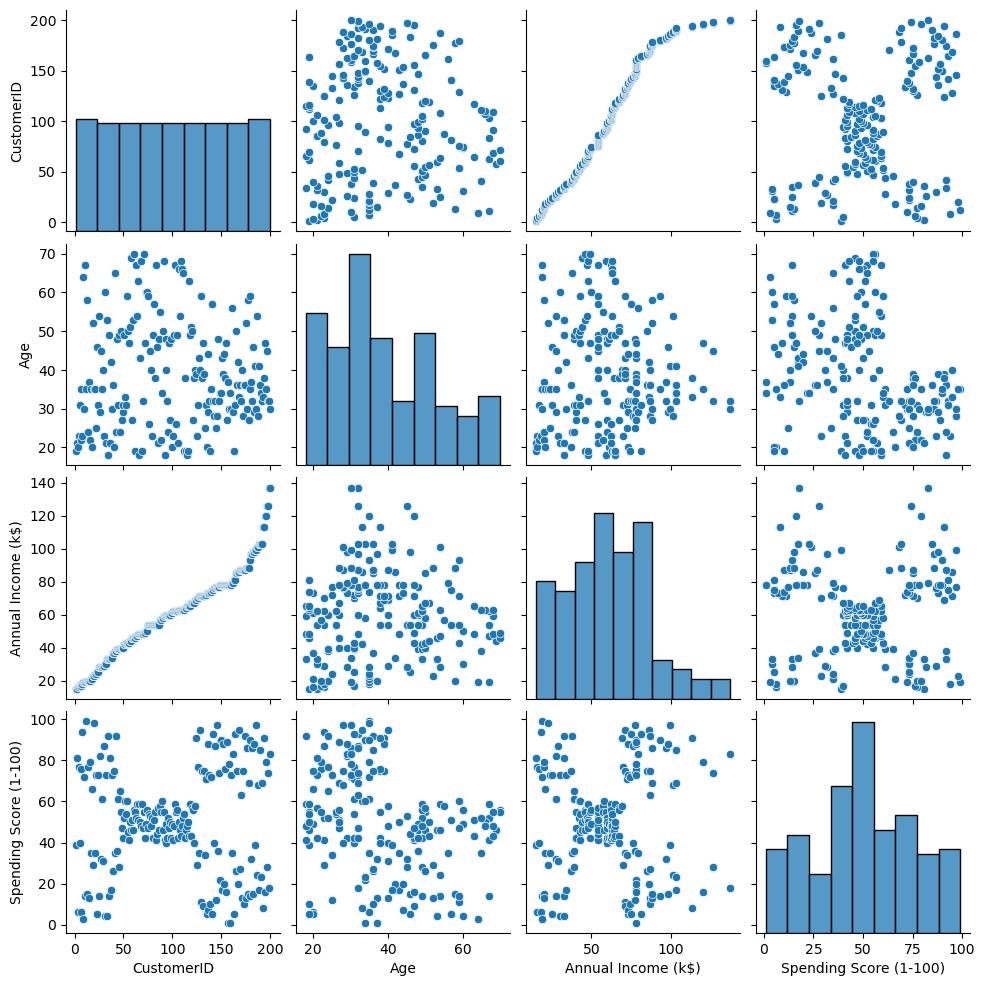

In [17]:
# Resumen estadístico
print(dataset.describe())

# Información general del dataset
print(dataset.info())

# Visualización de la distribución de las variables
sns.pairplot(dataset)
plt.show()

In [19]:
# Comprobamos valores faltantes
print(dataset.isnull().sum())

# Seleccionamos las características relevantes
features = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]

# Estandarización de las características
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


  File "C:\Users\Norida\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


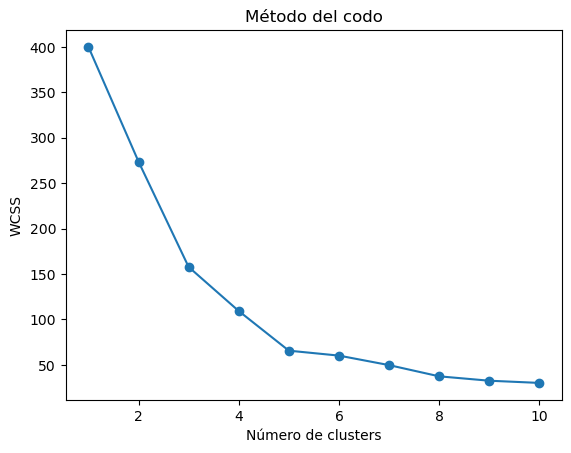

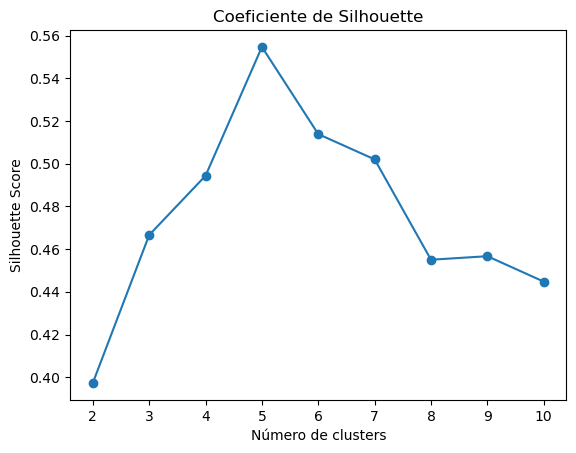

In [21]:
# Método del codo/elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

# Coeficiente de Silhouette
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Coeficiente de Silhouette')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [23]:
# Entrenamiento de k-means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)

# Asignación de clusters al dataset original
dataset['KMeans_Cluster'] = kmeans.labels_

# Verificamos los primeros registros para confirmar los clusters asignados
print(dataset.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   KMeans_Cluster  
0               4  
1               2  
2               4  
3               2  
4               4  


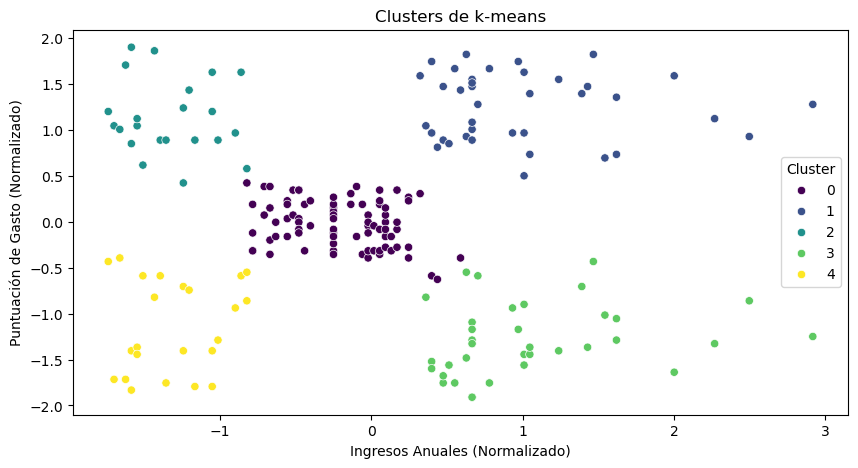

In [25]:
# Visualización de clusters usando 'Ingresos Anuales' y 'Puntuación de Gasto'
plt.figure(figsize=(10, 5))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=dataset['KMeans_Cluster'], palette="viridis")
plt.title('Clusters de k-means')
plt.xlabel('Ingresos Anuales (Normalizado)')
plt.ylabel('Puntuación de Gasto (Normalizado)')
plt.legend(title='Cluster')
plt.show()

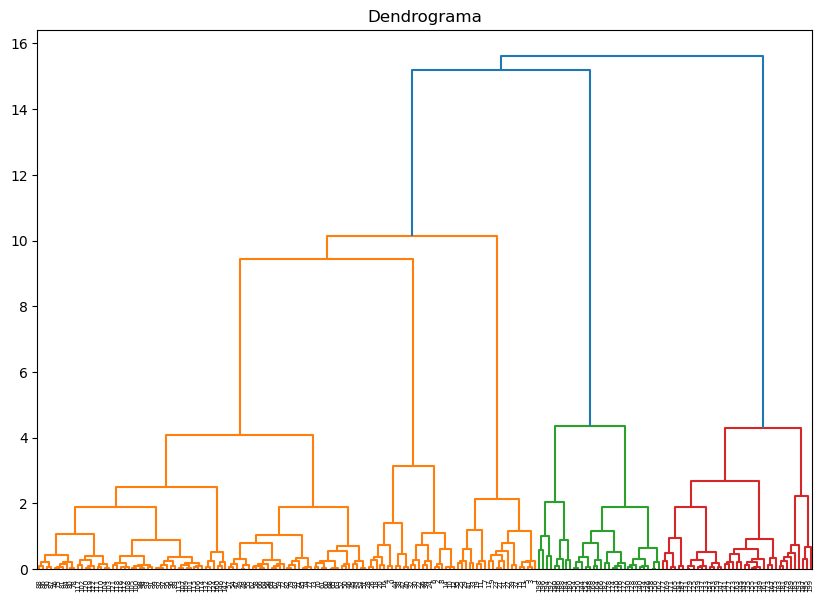

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   KMeans_Cluster  Hierarchical_Cluster  
0               4                     4  
1               2                     3  
2               4                     4  
3               2                     3  
4               4                     4  


In [27]:
# Dendrograma para clustering jerárquico
linked = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma')
plt.show()

# Clustering jerárquico con el número de clusters óptimo
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')  # Elimina affinity='euclidean'
dataset['Hierarchical_Cluster'] = hierarchical.fit_predict(scaled_features)

print(dataset.head())

In [29]:
# Evaluación k-means
kmeans_silhouette = silhouette_score(scaled_features, dataset['KMeans_Cluster'])
print(f"Coeficiente de Silhouette para k-means: {kmeans_silhouette}")

# Evaluación clustering jerárquico
hierarchical_silhouette = silhouette_score(scaled_features, dataset['Hierarchical_Cluster'])
print(f"Coeficiente de Silhouette para Clustering Jerárquico: {hierarchical_silhouette}")


Coeficiente de Silhouette para k-means: 0.5546571631111091
Coeficiente de Silhouette para Clustering Jerárquico: 0.5538089226688662


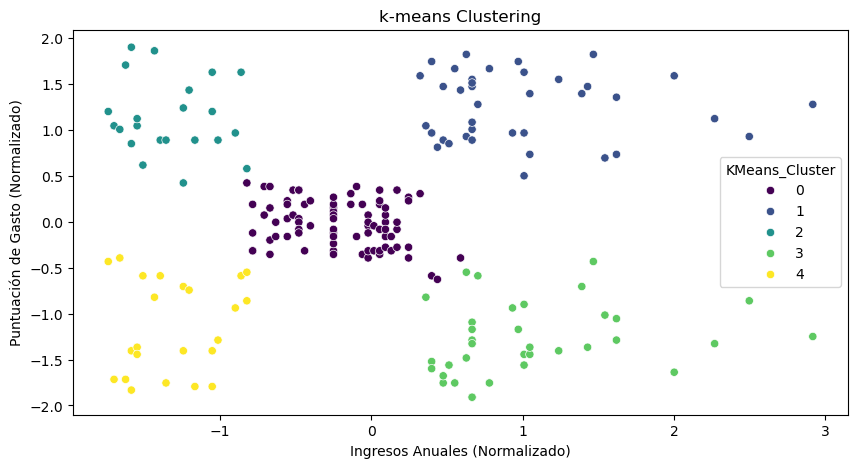

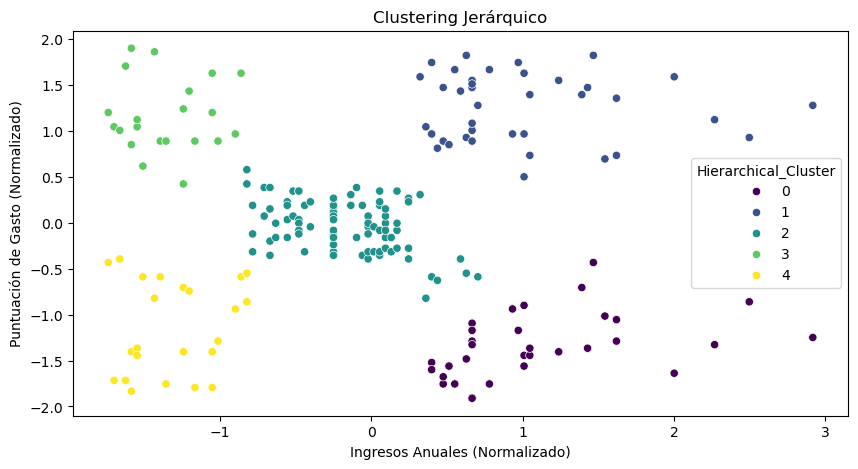

In [31]:
# Visualización de k-means
plt.figure(figsize=(10, 5))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=dataset['KMeans_Cluster'], palette="viridis")
plt.title('k-means Clustering')
plt.xlabel('Ingresos Anuales (Normalizado)')
plt.ylabel('Puntuación de Gasto (Normalizado)')
plt.show()

# Visualización de clustering jerárquico
plt.figure(figsize=(10, 5))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=dataset['Hierarchical_Cluster'], palette="viridis")
plt.title('Clustering Jerárquico')
plt.xlabel('Ingresos Anuales (Normalizado)')
plt.ylabel('Puntuación de Gasto (Normalizado)')
plt.show()
